# **Content-based filtering** 

Welcome to my project on creating a movie recommendation system using Python! In this project, I will be using the content-based filtering approach to recommend movies to users based on their preferences.

To do this, I will be using the MovieLens dataset, which contains information about movie ratings, genres, and other features. Using this dataset, I will build a recommendation system that suggests movies to users based on the movies they have watched and liked in the past.

Let's dive in and see how we can create an effective movie recommendation system using content-based filtering!

### **How Content-Based filtering works?**

Content-based filtering is a technique that uses the features of items to recommend other similar items. In the context of movies, this means that we will be recommending movies to users based on the similarities between the features of the movies and the preferences of the users. For example: 

* If a user has rated and liked movies that are categorized as "action" and "sci-fi," then the recommendation system could suggest other movies that fall within those same genres.
* If a user has rated and liked movies with a certain actor or director, the recommendation system could suggest other movies with that same actor or director.

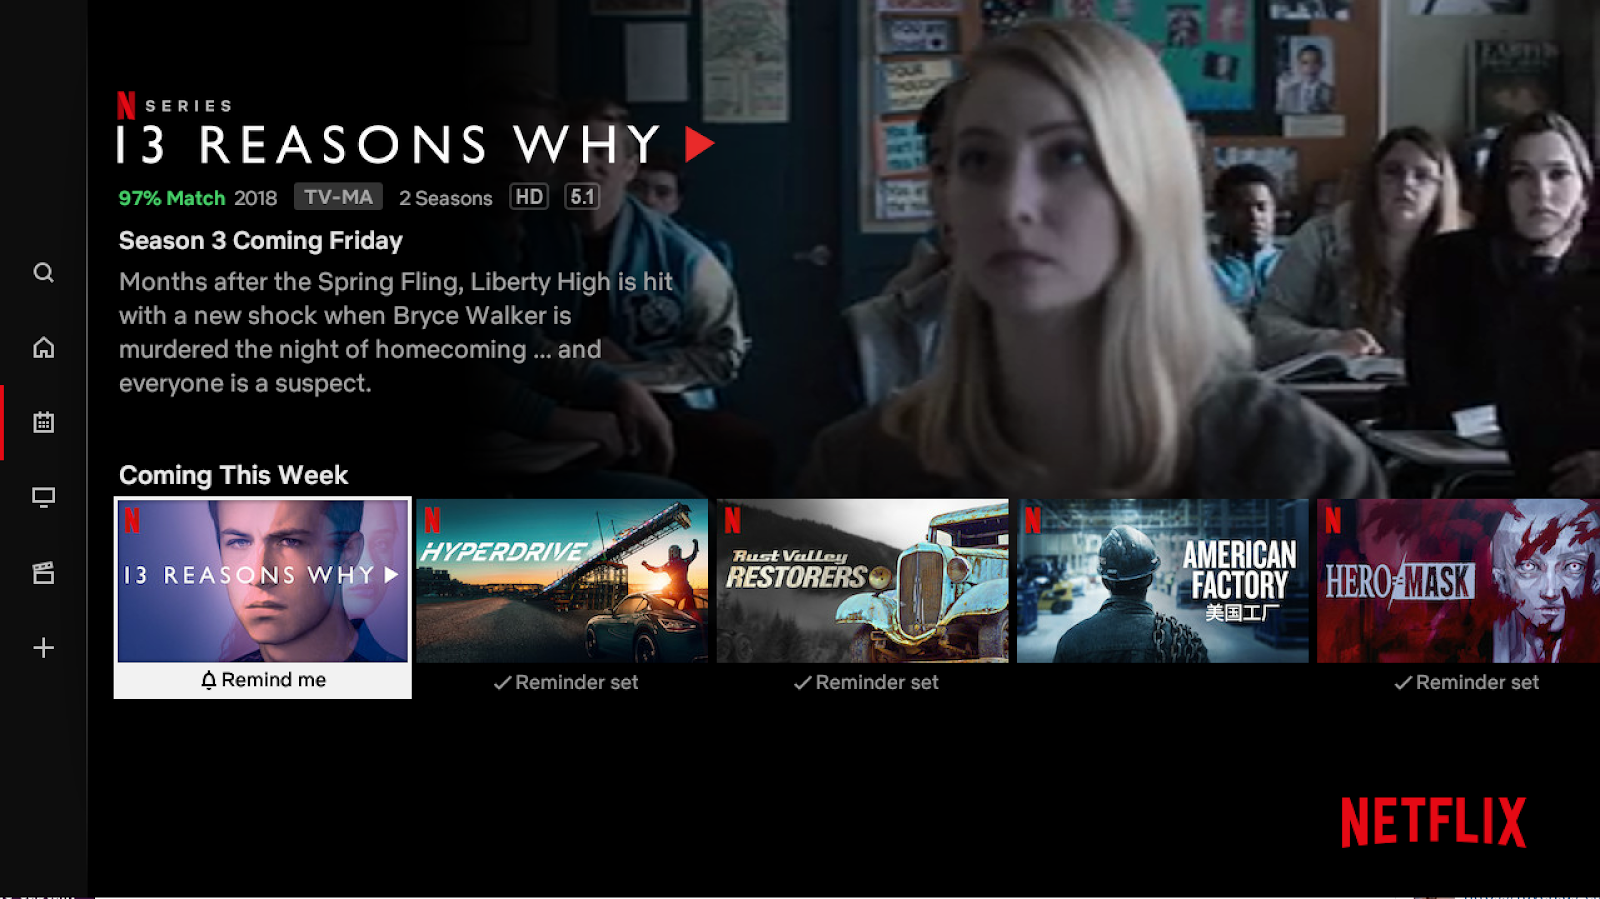

In this notebook, I will be focusing exclusively on content-based filtering to build a movie recommendation system. Content-based filtering is a personalized recommendation approach that utilizes the attributes of items to suggest similar items to users. By analyzing the properties and characteristics of a user's past movie choices, we can recommend movies with similar features that they are likely to enjoy. The goal of this project is to build a content-based recommendation system that can accurately recommend movies to users based on their past preferences and provide insights into how this approach can be applied to other domains.

As we progress with the analysis, we aim to answer: 

1. What are the most similar movies to a given movie, based on their content?
2. What are the most popular genres or themes among highly-rated movies?
3. Can we identify certain features or characteristics of movies that tend to be highly rated?
4. Given a user's viewing history, can we recommend movies with similar themes or content that they might enjoy?
5. Can we identify certain keywords or metadata associated with highly-rated movies, and use these to make recommendations?
6. How well does our content-based recommendation system perform compared to other methods, such as collaborative filtering or hybrid approaches?
7. How can we visualize the similarities or differences between movies based on their content, in order to gain insights into user preferences or movie trends?

Let's get started!

## **About the dataset**

The MovieLens DataSet is a widely used dataset for building Recommender Systems. This version of the dataset (1M) includes ratings of about 3,900 movies made by 6,040 users who joined MovieLens in 2000. The data was collected by GroupLens researchers over different periods, with this 1M version released in February 2003. To ensure quality, users were randomly selected for inclusion only if they had rated at least 20 movies. Each user is represented by an id, and no other information is given.

The original data are contained in three files, movies.dat, ratings.dat and users.dat, but I converted them into csv files to make them easier to work with. You can see the conversion process in my Data Processing Notebook

## **Loading the data**

Let's begin loading the data with Pandas onto Dataframes ratings, users, and movies. Be aware that I already pre-processed the column names, you can check the full description in the README file and in the Data_Preprocessing notebook.



In [32]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating']) # Ignoring timestamp
# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

Once the data is already loaded, we can take a look at it.

## **Movies Dataset**

In [33]:
# Check first 5 rows of movies
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
# Check the file information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


This is a Pandas DataFrame containing information on 3883 movies. It has 3 columns: movie_id, title, and genres. The movie_id is a unique identifier for each movie, the title column contains the name of the movie, and the genres column lists the genres associated with the movie. All columns have non-null values, and the data types of the columns are int64 for movie_id and object for title and genres.

## **Ratings Dataset**

In [35]:
# Check first 5 rows of ratings
ratings.head(5)

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [36]:
# Check the file information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


This is a Pandas DataFrame with 1000209 entries and 3 columns. The columns are 'user_id', 'movie_id', and 'rating', all of which contain integer data. There are no missing values in this DataFrame. The memory usage of this DataFrame is 22.9 MB.

## **Users Dataset**

In [37]:
# Check first 5 rows of ratings
users.head(5)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [38]:
# Check the file information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


This is a pandas DataFrame with 6040 entries and 5 columns: user_id, gender, zipcode, age_desc, and occ_desc. All columns have non-null values.

## **Exploratory Data Analysis**

#### 1. Check the number of unique movie genres and identify the most common genres.


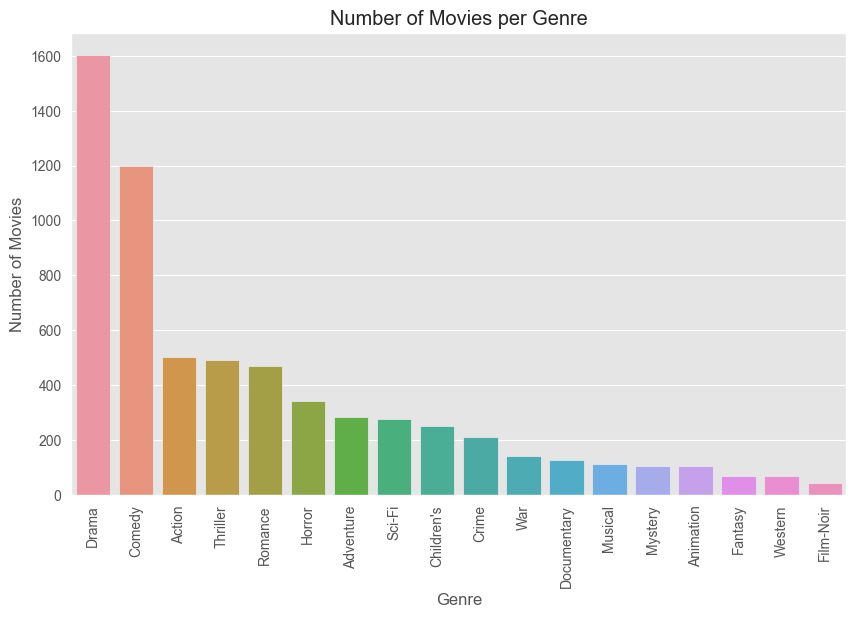

In [40]:
# split the genres into a list of genres
temp = movies.copy()
temp['genres'] = temp['genres'].str.split('|')

# create a new dataframe with the genres column expanded
genres_df = temp.explode('genres')

# count the number of movies in each genre
genre_counts = genres_df['genres'].value_counts()

# plot the genre counts in a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
ax.set_title("Number of Movies per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## **Findings**
* Drama and Comedy are the two most common genres in the dataset, with over 1600 and 1200 movies, respectively.
* The next most common genres, Action, Thriller, Romance, Horror, Adventure, and Sci-Fi, have between 276 and 503 movies each, indicating a wide variety of popular movie genres.
* Children's, Crime, War, Documentary, Musical, Mystery, Animation, Fantasy, Western, and Film-Noir are less common genres in the dataset, each with less than 250 movies.

There is a clear imbalance in the representation of different genres in the dataset, with some genres being significantly more common than others. This is important to keep in mind when performing analyses or drawing conclusions from the data.

#### 2. Check the distribution of movie titles by year or decade.


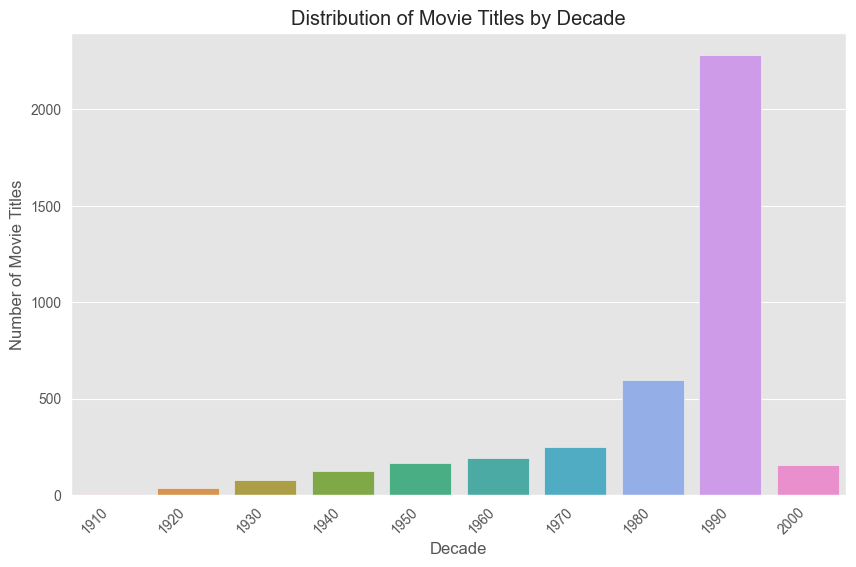

In [45]:
temp_2 = movies.copy()

# extract year from title and create a new column
temp_2['year'] = temp_2['title'].str.extract('\((\d{4})\)', expand=False)

# convert year column to numeric type
temp_2['year'] = pd.to_numeric(temp_2['year'])

# check distribution of movie titles by decade
temp_2['decade'] = (temp_2['year'] // 10) * 10
movie_counts = temp_2['decade'].value_counts().sort_index()

# plot the count of movie titles by decade
plt.figure(figsize=(10,6))
ax = sns.countplot(x='decade', data=temp_2)
ax.set_title("Distribution of Movie Titles by Decade")
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Movie Titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## **Findings**
* The number of movies released per decade has increased over time, with a significant increase in the 1980s and 1990s. This may be due to the growth of the movie industry and the increasing popularity of movies as a form of entertainment.

* The number of movies released during the 1910s, 1920s, and 1930s is much lower compared to the later decades. This may be due to the limited technology and resources available at the time, as well as the fact that movies were not yet a mainstream form of entertainment.

* The 2000s had the lowest number of movies released compared to other decades in the dataset. This may be due to the fact that the dataset only goes up to the year 2000, so the number of movies released in the latter half of the decade is not accounted for. Additionally, this could be a result of changes in the movie industry during this time, such as the rise of streaming services and changes in consumer preferences.

#### 3. Create a Word Cloud to visualize the most common words in the movie titles

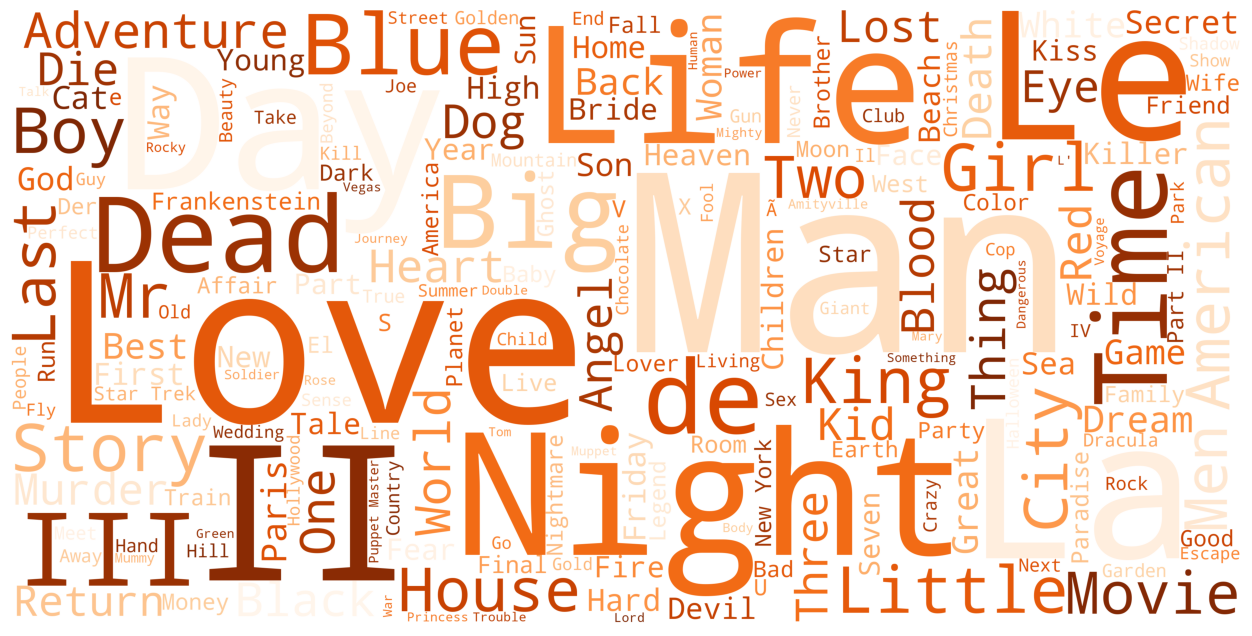

In [56]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, colormap='Oranges').generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


## **Insights**
* "Man" is a very common word in movie titles, appearing in 77 of them. This could suggest that movies with male protagonists are popular or have a higher chance of being produced than those with female protagonists.
* "Love" is another popular word in movie titles, appearing in 62 of them. This suggests that love stories or romantic movies are also very popular among movie-goers.
* "II" is a roman numeral indicating the second installment of a movie series or a sequel. This suggests that sequels or franchise movies are common.
* "Day" and "Night" appears in 77 movie titles, which could indicate that movies with a temporal theme or a particular day (e.g. Valentine's Day) are popular. 

It's important to note that these insights are based solely on the frequency of words in movie titles and further analysis may be needed to draw more conclusive insights.



